In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import resample

In [2]:
plt.rcParams['figure.figsize'] = [12, 6] #Make the graph big

In [3]:
# Generate time vector
duration = 1  # seconds
sampling_rate = 1000  # Hz
time_div = np.arange(0, duration, 1/sampling_rate) # x timeline
amplitude = 1

## Add A Minor Chord Plus 10 Hz Noise

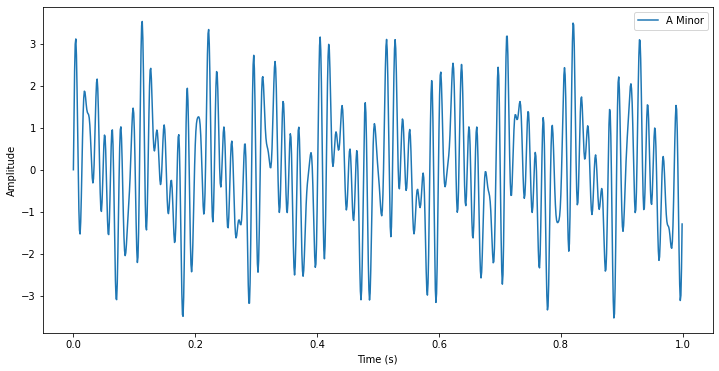

In [4]:
# A Minor = A (55 Hz) + C (65 Hz) + E(82 Hz)
# Generate sine waves
a_freq = 55
c_freq = 65
e_freq = 82
noise_freq = 10

a_wave = amplitude * np.sin(2 * np.pi * a_freq * time_div)
c_wave = amplitude * np.sin(2 * np.pi * c_freq * time_div)
e_wave = amplitude * np.sin(2 * np.pi * e_freq * time_div)
noise_wave = amplitude * np.sin(2 * np.pi * noise_freq * time_div)

a_minor_wave = a_wave + c_wave + e_wave + noise_wave

# Plot
plt.plot(time_div, a_minor_wave, label='A Minor')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

## Visualize All The Waves

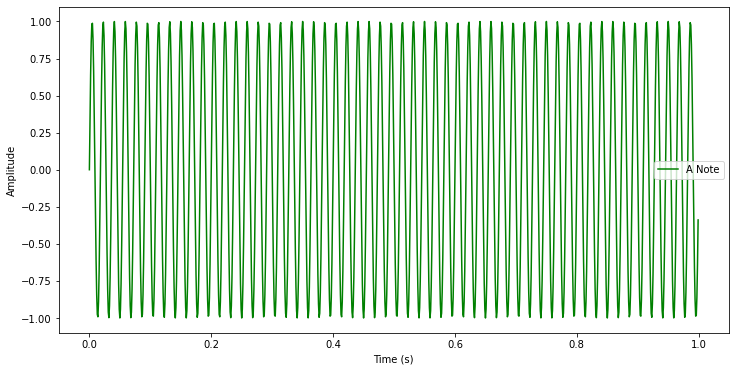

In [5]:
# Plot
plt.plot(time_div, a_wave, label='A Note', color='green')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

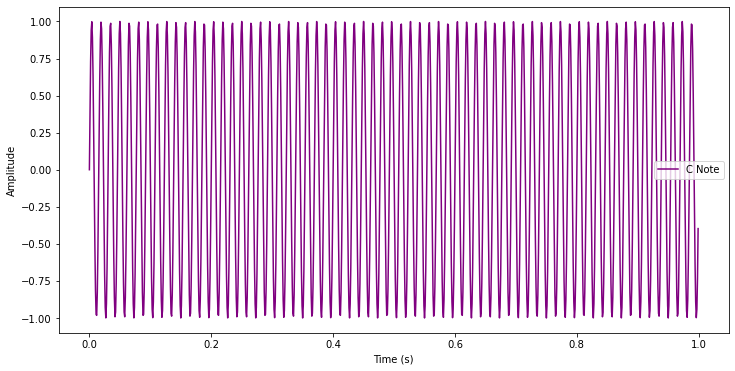

In [6]:
plt.plot(time_div, c_wave, label='C Note', color='purple')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

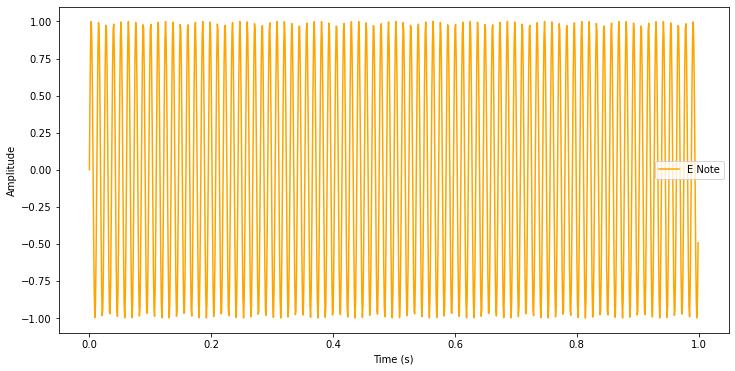

In [7]:
plt.plot(time_div, e_wave, label='E Note', color='orange')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

## Signal & Frequency Multiplication Results

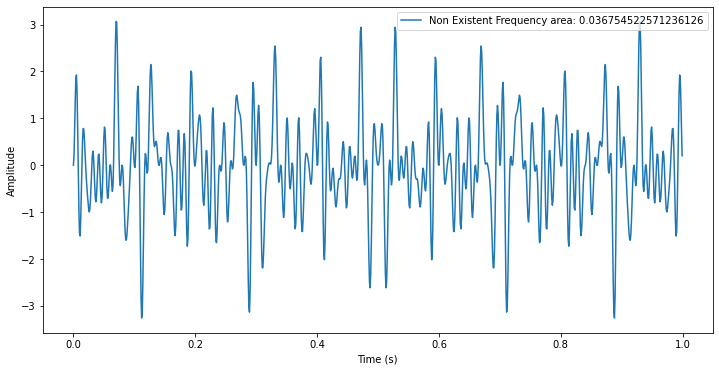

In [8]:
# Multiply non existent frequency
existent_freq = 25
non_existent_wave = amplitude * np.sin(2 * np.pi * existent_freq * time_div)
a_minor_wave_non_existent_wave = a_minor_wave * non_existent_wave

ne_above_x_axis = a_minor_wave_non_existent_wave > 0
ne_below_x_axis = a_minor_wave_non_existent_wave < 0
ne_area_above_x_axis = np.trapz(a_minor_wave_non_existent_wave[ne_above_x_axis], time_div[ne_above_x_axis])
ne_area_under_x_axis = np.trapz(a_minor_wave_non_existent_wave[ne_below_x_axis], time_div[ne_below_x_axis])

# Plot
plt.plot(
    time_div,
    a_minor_wave_non_existent_wave,
    label=f'Non Existent Frequency area: {ne_area_above_x_axis + ne_area_under_x_axis}'
)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

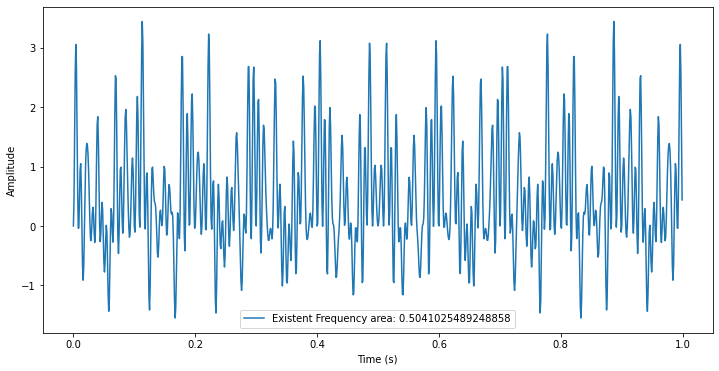

In [9]:
# Multiply existent frequency A, which is 55 Hz
existent_freq = 55
existent_wave = amplitude * np.sin(2 * np.pi * existent_freq * time_div)
a_minor_wave_existent_wave = a_minor_wave * existent_wave

ex_above_x_axis = a_minor_wave_existent_wave > 0
ex_below_x_axis = a_minor_wave_existent_wave < 0
ex_area_above_x_axis = np.trapz(a_minor_wave_existent_wave[ex_above_x_axis], time_div[ex_above_x_axis])
ex_area_under_x_axis = np.trapz(a_minor_wave_existent_wave[ex_below_x_axis], time_div[ex_below_x_axis])

# Plot
plt.plot(
    time_div,
    a_minor_wave_existent_wave,
    label=f'Existent Frequency area: {ex_area_above_x_axis + ex_area_under_x_axis}'
)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

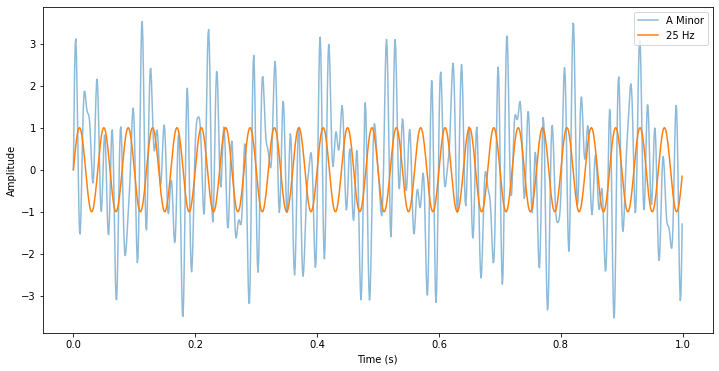

In [10]:
plt.plot(time_div, a_minor_wave, alpha=0.5, label='A Minor')
plt.plot(time_div, non_existent_wave * 1, label='25 Hz')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

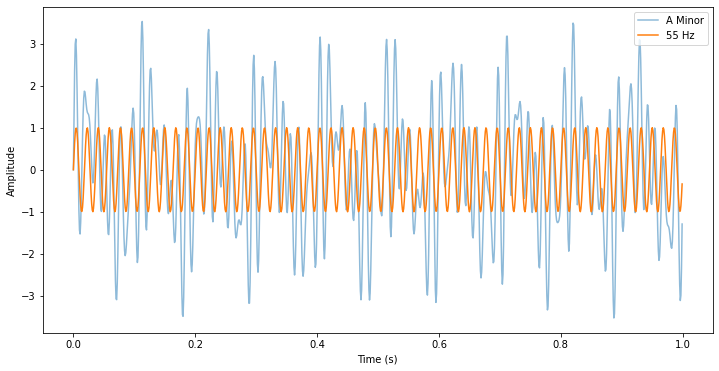

In [11]:
plt.plot(time_div, a_minor_wave, alpha=0.5, label='A Minor')
plt.plot(time_div, existent_wave * 1, label='55 Hz')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

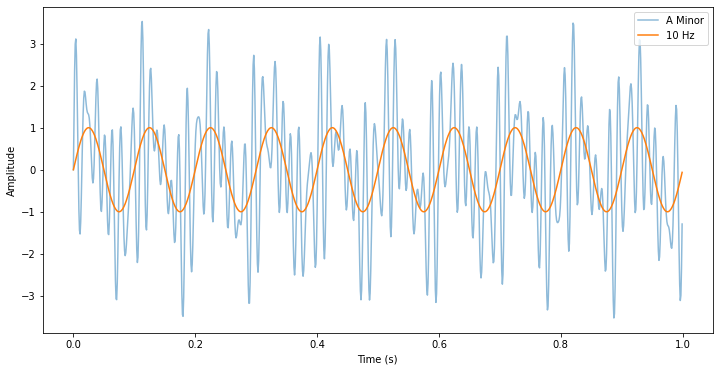

In [12]:
plt.plot(time_div, a_minor_wave, alpha=0.5, label='A Minor')
plt.plot(time_div, noise_wave * 1, label='10 Hz')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

In [49]:
f = 0  # Start sweeping at 0 Hz
nyquist_sampling_rate = sampling_rate * 2
a_minor_resampled = resample(a_minor_wave, nyquist_sampling_rate)
time_div_resampled = np.arange(0, 1, 1/nyquist_sampling_rate)

nyquist_freq = np.arange(0, len(a_minor_resampled), len(a_minor_resampled)/(nyquist_sampling_rate))
area_overview = np.zeros(len(nyquist_freq))

while f < len(area_overview):
    sin_wave = amplitude * np.sin(2 * np.pi * f * time_div_resampled)
    cos_wave = amplitude * np.cos(2 * np.pi * f * time_div_resampled)
    wave_multiplied = (sin_wave + cos_wave) * a_minor_resampled
    
    above_x_axis = sin_wave > 0
    below_x_axis = sin_wave < 0
    area_above_x_axis = np.trapz(wave_multiplied[above_x_axis], time_div_resampled[above_x_axis])
    area_under_x_axis = np.trapz(wave_multiplied[below_x_axis], time_div_resampled[below_x_axis])
    area_combined = area_above_x_axis + area_under_x_axis
    
    area_overview[f] = np.sum(wave_multiplied)
    
    # Examine next frequency
    f = f + 1

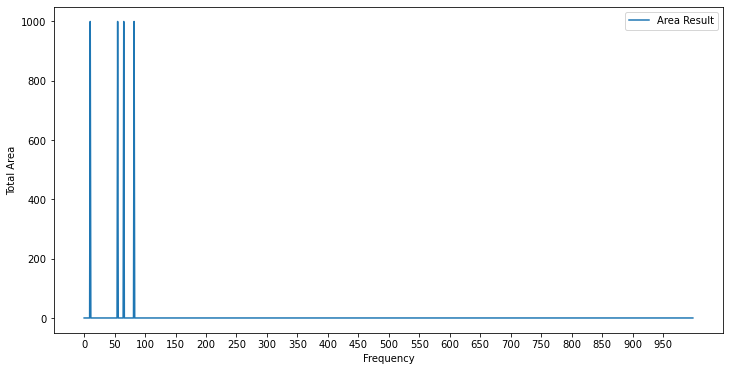

In [50]:
# Plot Nyquist
plt.plot(
    nyquist_freq[0 : len(nyquist_freq) // 2],
    area_overview[0 : len(area_overview) // 2],
    label='Area Result'
)
plt.xticks(np.arange(0, len(nyquist_freq) // 2, 50))
plt.xlabel('Frequency')
plt.ylabel('Total Area')
plt.legend()
plt.show()

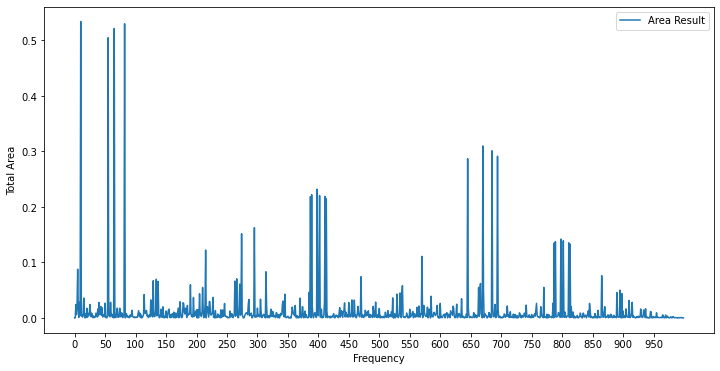

In [19]:
# Plot Nyquist Absolute
plt.plot(
    nyquist_freq[0 : len(nyquist_freq) // 2],
    abs(area_overview[0 : len(area_overview) // 2]),
    label='Area Result'
)
plt.xticks(np.arange(0, len(nyquist_freq) // 2, 50))
plt.xlabel('Frequency')
plt.ylabel('Total Area')
plt.legend()
plt.show()

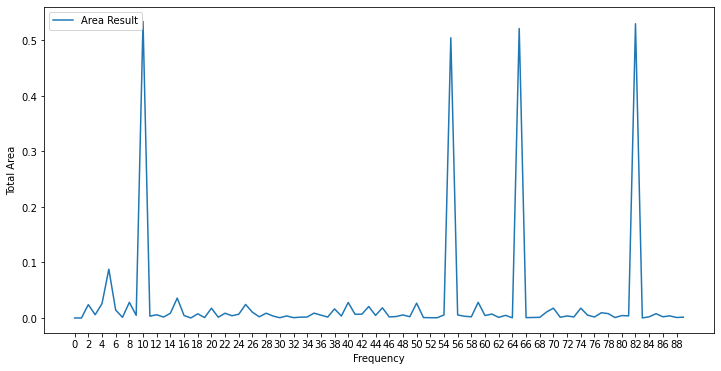

In [20]:
# Plot Nyquist Absolute Zoomed
zoom_to_frequency = 90

plt.plot(
    nyquist_freq[0 : zoom_to_frequency],
    abs(area_overview[0 : zoom_to_frequency]),
    label='Area Result'
)
plt.xticks(np.arange(0, zoom_to_frequency, 2))
plt.xlabel('Frequency')
plt.ylabel('Total Area')
plt.legend()
plt.show()

In [44]:
euler_f = 0
magnitude_overview = np.zeros(len(nyquist_freq), dtype = complex)

sine_wave_template = np.arange(len(nyquist_freq))
while euler_f < len(magnitude_overview):
    euler_wave = np.sum(a_minor_resampled * np.exp(-2j * np.pi * sine_wave_template * time_div_resampled[euler_f]))
    magnitude_overview[euler_f] = euler_wave
    
    # Examine next frequency
    euler_f = euler_f + 1

In [47]:
np.exp(-2j * np.pi * sine_wave_template * time_div_resampled[2])

array([1.        +0.j        , 0.99998026-0.00628314j,
       0.99992104-0.01256604j, ..., 0.99982235+0.01884844j,
       0.99992104+0.01256604j, 0.99998026+0.00628314j])

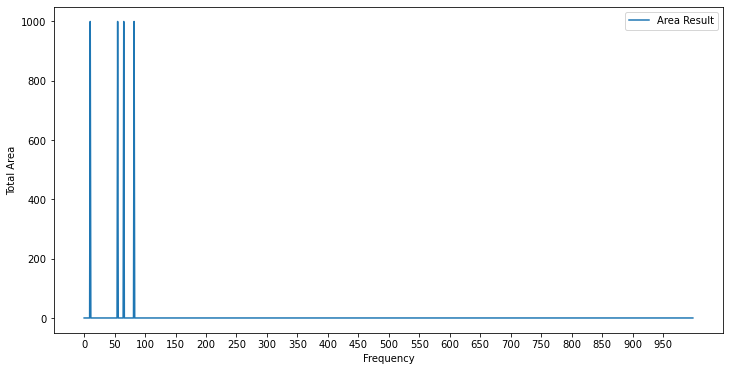

In [46]:
# Plot Nyquist
plt.plot(
    nyquist_freq[0 : len(nyquist_freq) // 2],
    abs(magnitude_overview[0 : len(magnitude_overview) // 2]),
    label='Area Result'
)
plt.xticks(np.arange(0, len(nyquist_freq) // 2, 50))
plt.xlabel('Frequency')
plt.ylabel('Total Area')
plt.legend()
plt.show()